In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pandas_profiling import ProfileReport


In [3]:
df = pd.read_csv('countries of the world.csv')
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [3]:
#Change column names
#Deal with missing values
#Change data types
#Columns
    #Region - Choose region categories and rename without caps and fill white space
    #Population and Area - Add commas
    #Check then change data types as many columns are off (use function?)
    
    
    

## Change Column Names

In [4]:
df.columns = (['country', 'region', 'population', 'area', 'population_density', 'coastline',
               'net_migration', 'infant_mortality', 'gdp', 'literacy_rate', 'phones', 'arable_land',
              'crops', 'other', 'climate', 'birthrate', 'deathrate', 'agriculture', 'industry',
               'service'])
df.columns

Index(['country', 'region', 'population', 'area', 'population_density',
       'coastline', 'net_migration', 'infant_mortality', 'gdp',
       'literacy_rate', 'phones', 'arable_land', 'crops', 'other', 'climate',
       'birthrate', 'deathrate', 'agriculture', 'industry', 'service'],
      dtype='object')

In [5]:
df.dtypes

country                object
region                 object
population              int64
area                    int64
population_density     object
coastline              object
net_migration          object
infant_mortality       object
gdp                   float64
literacy_rate          object
phones                 object
arable_land            object
crops                  object
other                  object
climate                object
birthrate              object
deathrate              object
agriculture            object
industry               object
service                object
dtype: object

## Change objects to float values

In [5]:
df['population_density'] = df['population_density'].apply(lambda x: float(str(x).replace(',', '.')))
df['coastline'] = df['coastline'].apply(lambda x: float(str(x).replace(',', '.')))
df['net_migration'] = df['net_migration'].apply(lambda x: float(str(x).replace(',', '.')))
df['infant_mortality'] = df['infant_mortality'].apply(lambda x: float(str(x).replace(',', '.')))
df['literacy_rate'] = df['literacy_rate'].apply(lambda x: float(str(x).replace(',', '.')))
df['phones'] = df['phones'].apply(lambda x: float(str(x).replace(',', '.')))
df['arable_land'] = df['arable_land'].apply(lambda x: float(str(x).replace(',', '.')))
df['crops'] = df['crops'].apply(lambda x: float(str(x).replace(',', '.')))
df['other'] = df['other'].apply(lambda x: float(str(x).replace(',', '.')))
df['climate'] = df['climate'].apply(lambda x: float(str(x).replace(',', '.')))
df['birthrate'] = df['birthrate'].apply(lambda x: float(str(x).replace(',', '.')))
df['deathrate'] = df['deathrate'].apply(lambda x: float(str(x).replace(',', '.')))
df['agriculture'] = df['agriculture'].apply(lambda x: float(str(x).replace(',', '.')))
df['industry'] = df['industry'].apply(lambda x: float(str(x).replace(',', '.')))
df['service'] = df['service'].apply(lambda x: float(str(x).replace(',', '.')))



    

## Strip all white spaces from the region column

In [7]:
df['region'] = df['region'].str.strip()


## Fill missing values

In [8]:
##First we see which columns have missing value
df.isnull().sum()
 

country                0
region                 0
population             0
area                   0
population_density     0
coastline              0
net_migration          3
infant_mortality       3
gdp                    1
literacy_rate         18
phones                 4
arable_land            2
crops                  2
other                  2
climate               22
birthrate              3
deathrate              4
agriculture           15
industry              16
service               15
dtype: int64

### For numerical features with many outliers - fill with Median
### For numerical features with a minimal amount of outliers - fill with Mean
### For categorical features - fill with Mode

#### Note: Boxplots used to determine how NA features will be filled. Commented out Boxplots to display one at a time

<AxesSubplot:xlabel='deathrate'>

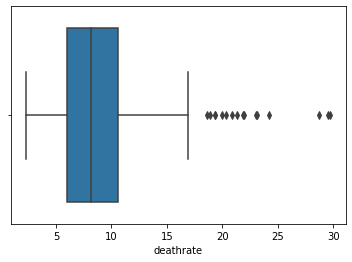

In [10]:
#Fill Median - net migration, crops, industry 
#Fill Mean -  infant morality, gdp, literacy rate, phones, arable land, other, birthrate, service, agriculture 
#Fill Mode - climate
#sns.boxplot(x=df['industry'])
#sns.boxplot(x=df['net_migration'])
#sns.boxplot(x=df['infant_mortality'])
#sns.boxplot(x=df['gdp'])
#sns.boxplot(x=df['literacy_rate'])
#sns.boxplot(x=df['phones'])
#sns.boxplot(x=df['arable_land'])
#sns.boxplot(x=df['crops'])
#sns.boxplot(x=df['other'])
#sns.boxplot(x=df['climate'])
#sns.boxplot(x=df['birthrate'])
#sns.boxplot(x=df['agriculture'])
#sns.boxplot(x=df['service'])
sns.boxplot(x=df['deathrate'])



### We use boxplots as a tool in part to display the amount of outliers each variable has. The following variables will be filled in by the Median due to the large amount of outliers found: net migration, crops and industry. 

### The rest of the variables will be filled in by the Mean. However, the only exception is Climate which, by default, as a categorical feature will be filled by the Mode.
    

In [9]:
#Median
cols_med = ['net_migration', 'crops', 'industry']
df[cols_med] = df[cols_med].fillna((df[cols_med].median()))

#Mean
cols_mean = ['infant_mortality', 'gdp', 'literacy_rate', 'phones', 'arable_land', 'other', 'birthrate', 'agriculture', 'service', 'deathrate']
df[cols_mean] = df[cols_mean].fillna((df[cols_mean].mean()))

#Mode - Climate
df['climate'] = df['climate'].fillna((df['climate'].mode()[0]))


### Confirm missing data is filled

In [11]:
df.isnull().sum()

country               0
region                0
population            0
area                  0
population_density    0
coastline             0
net_migration         0
infant_mortality      0
gdp                   0
literacy_rate         0
phones                0
arable_land           0
crops                 0
other                 0
climate               0
birthrate             0
deathrate             0
agriculture           0
industry              0
service               0
dtype: int64

### Create clean dataset

In [14]:
df.to_csv('countries_of_the_world_clean.csv', index=False)